In [169]:
import numpy as np
import pandas as pd

# Simulated RTM reflectance values, given a guessed COD
RTM = [{
    'C01': 0.26012066224288277,
    'C02': 0.2667815047905921,
    'C03': 0.20920294749211518,
    'C04': 0.0,
    'C05': 0.08863699237239582,
    'C06': 0.1178736773810107
    }
]
COD_guess = 10
# Convert RTM list to a pandas DataFrame with 6 columns named as strings
rtm = pd.DataFrame(RTM)
rtm.index = [COD_guess]
rtm.index.name = 'COD'
rtm

,C01,C02,C03,C04,C05,C06
COD,,,,,,
10,0.260121,0.266782,0.209203,0.0,0.088637,0.117874


In [148]:
# Simulated GOES observed reflectance values
sat= pd.DataFrame([{
    'C01': 0.630718,
    'C02': 0.606127,
    'C03': 0.663069,
    'C04': 0.000356,
    'C05': 0.504197,
    'C06': 0.318284
}])
sat = pd.concat([sat, sat])
sat

,C01,C02,C03,C04,C05,C06
0,0.630718,0.606127,0.663069,0.000356,0.504197,0.318284
0,0.630718,0.606127,0.663069,0.000356,0.504197,0.318284


In [138]:
df_division = df_rtm / df_sat.values
df_division['C01'].values

array([0.41241991])

1. Visible Band:
Band 1 (C01): Centered at 0.47 micrometers, this is the blue visible band. It is sensitive to the reflective properties of aerosols and clouds, helping to identify atmospheric constituents and the microphysical properties of clouds.

2. Near-Infrared Bands (useful for reflecting visible light):
Band 2 (C02): Centered at 0.64 micrometers, this is near the red visible spectrum. It’s often used for detecting land surface features, cloud properties, and some ocean color applications.

In [154]:
sun_zen = 10.256
sun_zen = round(sun_zen, 0)
sun_zen

10.0

In [139]:
# Define a function to compute the Mean Squared Error between RTM and GOES reflectance
def compute_mse(df_rtm, df_sat):
    rms = np.mean((df_rtm - df_sat.values) ** 2)
    df_division = df_rtm / df_sat.values
    rate_div = df_division['C01']
    return rms, rate_div.values[0]

# Function to update COD
def update_cod(COD, mse, learning_rate):
    # A simple gradient descent step to minimize the MSE
    return COD - learning_rate * mse
def update_cod(rtm, sat, COD_guess):
    # Calculate initial difference and MSE
    ini_mse,rate_div = compute_mse(RTM_series, sat_series)
    # Print initial MSE
    print(f"Initial MSE: {ini_mse}")
    print(f"Initial difference: {ini_diff}")
    if initial_mse < 0.01:
        print("Initial MSE is less than 0.0001. Stopping the optimization.")
        exit()
    if rate_div > 1 :
        print("lower COD")
        # Update COD based on initial MSE
        #new_COD = update_cod(COD, initial_mse, learning_rate)
    else: #< 1:
        print("increase COD")
        # Update COD based on initial MSE
        #new_COD = update_cod(COD, initial_mse, learning_rate)
    COD_guess = COD_guess/rate_div

    return COD_guess

In [140]:
ini_mse, rate_div = compute_mse(rtm, sat)
ini_mse, rate_div

(0.11189111492972882, 0.41241991229500785)

In [149]:
def update_cod_adagrad(rtm, sat, COD_guess, learning_rate, epsilon=1e-8):
    # Calculate initial difference and MSE
    ini_mse, rate_div = compute_mse(rtm, sat)
    # Print initial MSE
    print(f"Initial MSE: {ini_mse}")

    if ini_mse < 0.01:
        print("Initial MSE is less than 0.01. Stopping the optimization.")
        return COD_guess

    # Initialize the cache for squared gradients
    if 'cache' not in update_cod_adagrad.__dict__:
        update_cod_adagrad.cache = 0

    # Calculate the "gradient" part
    grad_mse = ini_mse

    # Accumulate squared gradients
    update_cod_adagrad.cache += grad_mse ** 2

    # Compute the adjusted learning rate using AdaGrad
    adj_learning_rate = learning_rate / np.sqrt(update_cod_adagrad.cache + epsilon)

    # Adjust COD based on the comparison
    if rate_div > 1:
        print("Lower COD")
        COD_guess -= adj_learning_rate * grad_mse
    else:
        print("Increase COD")
        COD_guess += adj_learning_rate * grad_mse

    # Optionally, adjust COD directly based on the rate_div
    COD_guess = COD_guess / rate_div

    return COD_guess

# Example to call the function
RTM_series = np.array([1.0]) # Replace with actual RTM series data
sat_series = np.array([0.9]) # Replace with actual satellite data
COD_guess = 10.0 # Initial guess for COD
learning_rate = 0.01

COD_updated = update_cod_adagrad(rtm, sat.iloc[0], COD_guess, learning_rate)
print(f"Updated COD: {COD_updated}")

Initial MSE: 0.11189111492972882
Increase COD
Updated COD: 24.27137899405309


In [134]:
rtm

,C01,C02,C03,C04,C05,C06,COD
COD,,,,,,,
10,0.260121,0.266782,0.209203,0.0,0.088637,0.117874,NaN


In [185]:
import numpy as np
import pandas as pd

# Simulated RTM reflectance values, given a guessed COD
RTM = [{
    'C01': 0.26012066224288277,
    'C02': 0.2667815047905921,
    'C03': 0.20920294749211518,
    'C04': 0.0,
    'C05': 0.08863699237239582,
    'C06': 0.1178736773810107
    }
]
COD_guess = 10
# Convert RTM list to a pandas DataFrame with 6 columns named as strings
rtm = pd.DataFrame(RTM)
rtm.index = [COD_guess]
rtm.index.name = 'COD'
rtm

,C01,C02,C03,C04,C05,C06
COD,,,,,,
10,0.260121,0.266782,0.209203,0.0,0.088637,0.117874


In [186]:
learning_rate = 1

In [187]:
for i in range(10):
    COD_guess,r = update_cod_adagrad(rtm, sat.iloc[0], COD_guess, learning_rate)
    rtm = rtm +0.1
    print(f"Updated COD: {COD_guess}",r)


MSE: 0.1119
24.247131871864873
Updated COD: 24.0 0.11189111492972882
MSE: 0.0626
Increase COD
24.012487262523443
Updated COD: 24.0 0.06255327440569537
MSE: 0.0332
Increase COD
24.00663051981088
Updated COD: 24.0 0.03321543388166195
MSE: 0.0239
Increase COD
24.004766430506766
Updated COD: 24.0 0.023877593357628495
MSE: 0.0345
Lower COD
23.993105359651324
Updated COD: 24.0 0.03453975283359504
MSE: 0.0652
Lower COD
23.98698584593914
Updated COD: 24.0 0.06520191230956157
MSE: 0.1159
17.598963336757414
Updated COD: 18.0 0.1158640717855281
MSE: 0.1865
11.824476283511165
Updated COD: 12.0 0.18652623126149462
MSE: 0.2772
7.1393910802447555
Updated COD: 7.0 0.2771883907374611
MSE: 0.3879
3.8056610348309357
Updated COD: 4.0 0.38785055021342774


In [ ]:
def update_cod_adagrad(rtm, sat, COD_guess, learning_rate, epsilon=1e-8):
    # Calculate initial difference and MSE
    ini_mse, rate_div = compute_mse(rtm, sat)
    # Print initial MSE
    print(f"MSE: {ini_mse:.4f}")

    if ini_mse < 0.01:
        print("Initial MSE is less than 0.01. Stopping the optimization.")
        return COD_guess

    # Initialize the cache for squared gradients
    if 'cache' not in update_cod_adagrad.__dict__:
        update_cod_adagrad.cache = 0
    
    if ini_mse>0.1:
        COD_guess = COD_guess / rate_div
    # # Adjust COD based on the comparison
    else:
        if rate_div > 1:
            COD_guess -= learning_rate
            print("Lower COD")
        else:
            COD_guess += learning_rate
            print("Increase COD")
    
    print(COD_guess)
    return round(COD_guess, 0), ini_mse

In [ ]:
sat_ref = sat[['C01', 'C02', 'C03', 'C04', 'C05', 'C06']]
for i in range(sat_ref.shape[0]):
    COD_guess = 10.0
    learning_rate = 1
    r = 1
    j=0
    while (r > 0.01):
        j+=1
        df_channel_ref = nearealtime_RTM(Sun_Zen, local_zen, rela_azi, COD_guess, TPW, file_dir=data_dir)
        df_channel_ref.index = [COD_guess]
        df_channel_ref.index.name = 'COD'
        COD_guess, r = update_cod_adagrad(df_channel_ref, sat_ref.iloc[i], COD_guess, learning_rate)
        del df_channel_ref
        if COD_guess>50:
            COD_guess = 50
            break
        if j > 3:
            # Move the COD from index to a column
            df_channel_ref.reset_index(inplace=True)
            
            # Interpolate the 5 group of df_channel_ref to find the sat_ref.iloc[i] corresponded COD
            df_interpolated = df_channel_ref.interpolate(method='linear', limit_direction='both')
            
            # Find the closest COD value corresponding to sat_ref.iloc[i]
            closest_COD = df_interpolated.loc[(df_interpolated[channels] - sat_ref.iloc[i]).abs().sum(axis=1).idxmin(), 'COD']

            COD_guess = closest_COD
            break
    print('row',i,'COD',COD_guess, r)
    sat.at[i, 'COD'] = COD_guess

NameError: name 'nearealtime_RTM' is not defined

In [211]:
#make up a df_channel_ref with 6 row for each column 
df_channel_ref = pd.DataFrame(columns=['C01', 'C02', 'C03', 'C04', 'C05', 'C06'])
for i in range(6):
    df_channel_ref.loc[i] = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
df_channel_ref.index = [10, 20, 30, 40, 50, 60]
df_channel_ref.index.name = 'COD'   
df_channel_ref

,C01,C02,C03,C04,C05,C06
COD,,,,,,
10,0.1,0.2,0.3,0.4,0.5,0.6
20,0.1,0.2,0.3,0.4,0.5,0.6
30,0.1,0.2,0.3,0.4,0.5,0.6
40,0.1,0.2,0.3,0.4,0.5,0.6
50,0.1,0.2,0.3,0.4,0.5,0.6
60,0.1,0.2,0.3,0.4,0.5,0.6


In [214]:
channels

['C01', 'C02', 'C03', 'C04', 'C05', 'C06']

In [198]:
sat_ref = sat

In [213]:
df_interpolated

,COD,C01,C02,C03,C04,C05,C06
0,10,0.1,0.2,0.3,0.4,0.5,0.6
1,20,0.1,0.2,0.3,0.4,0.5,0.6
2,30,0.1,0.2,0.3,0.4,0.5,0.6
3,40,0.1,0.2,0.3,0.4,0.5,0.6
4,50,0.1,0.2,0.3,0.4,0.5,0.6
5,60,0.1,0.2,0.3,0.4,0.5,0.6


In [208]:
df_interpolated[channels] - sat_ref.iloc[0]

,C01,C02,C03,C04,C05,C06
0,-0.530718,-0.406127,-0.363069,0.399644,-0.004197,0.281716
1,-0.530718,-0.406127,-0.363069,0.399644,-0.004197,0.281716
2,-0.530718,-0.406127,-0.363069,0.399644,-0.004197,0.281716
3,-0.530718,-0.406127,-0.363069,0.399644,-0.004197,0.281716
4,-0.530718,-0.406127,-0.363069,0.399644,-0.004197,0.281716
5,-0.530718,-0.406127,-0.363069,0.399644,-0.004197,0.281716


In [ ]:
if j > 3:
    # Move the COD from index to a column
    df_channel_ref.reset_index(inplace=True)
    # Interpolate the 5 group of df_channel_ref to find the sat_ref.iloc[i] corresponded COD
    df_interpolated = df_channel_ref.interpolate(method='linear', limit_direction='both')
    # Find the closest COD value corresponding to sat_ref.iloc[i]
    closest_COD = df_interpolated.loc[(df_interpolated[channels] - sat_ref.iloc[0]).abs().sum(axis=1).idxmin(), 'COD']

    print(COD_guess) # = closest_COD

10


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


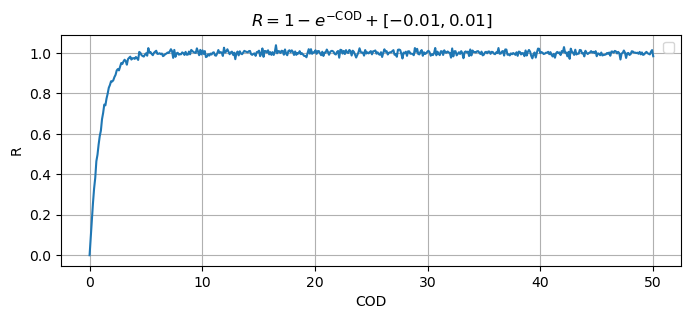

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Define COD range from 0 to 50
COD = np.linspace(0, 50, 500)

# Calculate R using the given formula
R = 1 - np.exp(-COD) + np.random.normal(0, 0.01, COD.shape)

# Plot the function
plt.figure(figsize=(8, 3))
plt.plot(COD, R)# label=r'$R = 1 - \exp(-COD)+[-0.01,0.01]$', color='blue')

# Add labels and title
plt.xlabel('COD')
plt.ylabel('R')
plt.title(r'$R = 1 - e^{-\mathrm{COD}}+[-0.01,0.01]$')
plt.legend()

# Show grid
plt.grid(True)
#plt.ylim(0.8,1.02)
# Show the plot
plt.show()


In [37]:
loss_function(0.5, 0.49)

0.00010000000000000018

In [ ]:
import numpy as np

# Placeholder for your RTM model that outputs Rc_rtm given a COD input
def rtm_model(COD):
    # Replace this with your actual RTM function. This is just a mock placeholder.
    # For illustrative purposes, assuming simple relation Rc = 1 - e^(-COD)
    return 1 - np.exp(-COD)

# Compute loss as the squared difference between real and predicted reflectance
def loss_function(Rc_real, Rc_rtm):
    return (Rc_real - Rc_rtm) ** 2

def compute_gradient(Rc_rtm, COD, Rc_real):
    # Calculate the exponential term
    exp_term = np.exp(-COD)
    # Gradient calculation
    gradient = 2 * (Rc_real - Rc_rtm) * exp_term
    return gradient


# Gradient descent-based estimation of COD
def estimate_cod_backpropagation(Rc_real, initial_COD=10.0, A=1.0, C=1e-5, learning_rate=1, tolerance=1e-6, max_iterations=1000):
    COD = initial_COD

    for iteration in range(max_iterations):
        # Compute the current predicted reflectance
        Rc_rtm = rtm_model(COD)
        
        # Compute loss
        error = loss_function(Rc_real, Rc_rtm)
        
        # Check for convergence
        if error < tolerance:
            print(f'Converged after {iteration} iterations')
            break
        
        # Compute the gradient
        gradient = compute_gradient(COD, Rc_real, C, A)
        
        # Update COD using the gradient
        COD -= learning_rate * gradient
        
        # Debug print for each iteration
        print(f'Iteration {iteration}, COD: {COD}, Error: {error}, Gradient: {gradient}')
    
    return COD

# Example usage
Rc_real = 0.5  # Replace with actual observed reflectance
estimated_COD = estimate_cod_backpropagation(Rc_real)
print(f'Estimated COD: {estimated_COD}')

Iteration 0, COD: 9.18058005398455, Error: 0.24995460213139112, Gradient: 0.8194199460154515
Iteration 1, COD: 8.26924718656852, Error: 0.24989698985506284, Gradient: 0.9113328674160277
Iteration 2, COD: 7.30729520907324, Error: 0.24974378753020174, Gradient: 0.9619519774952807
Iteration 3, COD: 6.323309062478527, Error: 0.24932982123152939, Gradient: 0.9839861465947127
Iteration 4, COD: 5.332420413571455, Error: 0.2482092212015958, Gradient: 0.9908886489070717
Iteration 5, COD: 4.3441302828941275, Error: 0.2451909921614338, Gradient: 0.9882901306773277
Iteration 6, COD: 3.3708455450375494, Error: 0.23718575826048421, Gradient: 0.973284737856578
Iteration 7, COD: 2.439837640720902, Error: 0.21682007723766897, Gradient: 0.9310079043166476
Iteration 8, COD: 1.6142823496066967, Error: 0.17042447733572946, Gradient: 0.8255552911142053
Iteration 9, COD: 1.0123795021717787, Error: 0.09058086082551432, Gradient: 0.601902847434918
Iteration 10, COD: 0.7390937234059101, Error: 0.018672306953277